NOTE: the code pulled is an example of how I pulled data for SPY ticket for Mar22 - Mar26. This code was re-ran for each date. Graphs were saved, and shown below in notebook.
First, we must import the necessary packages:

In [1]:
#Import
import numpy as np
import requests
import pandas as pd
import researchpy
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import config

I created a config.py file which contains the urls, and my personal API key. We are pulling data for SPY ticket at one minute intervals:

Pull data using API example (again, this was ran for Mar22 - Mar26 to create CSV files for each date):  
URL = config.Mar22  
r = requests.get(URL, params = {'apikey': config.api_key})  
priceWave = r.json()  
prices = priceWave['candles']  
df = pd.DataFrame(prices)  
df.to_csv("Mar22_raw.csv")  

In [2]:
#We can run the code for each graph.
df = pd.read_csv (r'Mar22_raw.csv')
df.tail()

,Unnamed: 0,open,high,low,close,volume,datetime
701,701,393.08,393.14,393.08,393.14,1500,1616457300000
702,702,393.17,393.20,393.14,393.17,1800,1616457360000
703,703,393.16,393.22,393.16,393.19,1920,1616457420000
704,704,393.15,393.15,393.15,393.15,1700,1616457480000
705,705,393.14,393.25,393.14,393.24,6252,1616457540000


Next, we convert time from milliseconds since Epoch to Eastern, and only keep the hours, minutes, and seconds:

In [3]:
#Convert time
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
df['time'] = df['datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df['time'] = df['time'].dt.time
df.drop(columns=['datetime'])
df.drop(['datetime'], axis=1, inplace=True)
df.tail()

,Unnamed: 0,open,high,low,close,volume,time
701,701,393.08,393.14,393.08,393.14,1500,19:55:00
702,702,393.17,393.20,393.14,393.17,1800,19:56:00
703,703,393.16,393.22,393.16,393.19,1920,19:57:00
704,704,393.15,393.15,393.15,393.15,1700,19:58:00
705,705,393.14,393.25,393.14,393.24,6252,19:59:00


Find average price of each minute:

In [4]:
#AVG
df['AVG'] = (((df['high'] + df['low'] + df['close']) / 3).round(2))
df.tail()

,Unnamed: 0,open,high,low,close,volume,time,AVG
701,701,393.08,393.14,393.08,393.14,1500,19:55:00,393.12
702,702,393.17,393.20,393.14,393.17,1800,19:56:00,393.17
703,703,393.16,393.22,393.16,393.19,1920,19:57:00,393.19
704,704,393.15,393.15,393.15,393.15,1700,19:58:00,393.15
705,705,393.14,393.25,393.14,393.24,6252,19:59:00,393.21


Find Volume Weighted Adjusted Price (VWAP):

In [5]:
#VWAP
df['PV'] = (df['AVG'] * df['volume']).round(2)
df['cumPV'] = (np.cumsum(df['PV'])).round(2)
df['cumV'] = (np.cumsum(df['volume'])).round(2)
df['VWAP'] = (df['cumPV'] / df['cumV']).round(2)
df.tail()

,Unnamed: 0,open,high,low,close,volume,time,AVG,PV,cumPV,cumV,VWAP
701,701,393.08,393.14,393.08,393.14,1500,19:55:00,393.12,589680.00,2.090354e+10,53272892,392.39
702,702,393.17,393.20,393.14,393.17,1800,19:56:00,393.17,707706.00,2.090425e+10,53274692,392.39
703,703,393.16,393.22,393.16,393.19,1920,19:57:00,393.19,754924.80,2.090500e+10,53276612,392.39
704,704,393.15,393.15,393.15,393.15,1700,19:58:00,393.15,668355.00,2.090567e+10,53278312,392.39
705,705,393.14,393.25,393.14,393.24,6252,19:59:00,393.21,2458348.92,2.090813e+10,53284564,392.39


Find Exponential Moving Average (EMA):

In [6]:
#EMA
df['EMA'] = df['AVG'].ewm(span=7, adjust=False).mean()
df.tail()

,Unnamed: 0,open,high,low,close,volume,time,AVG,PV,cumPV,cumV,VWAP,EMA
701,701,393.08,393.14,393.08,393.14,1500,19:55:00,393.12,589680.00,2.090354e+10,53272892,392.39,393.078318
702,702,393.17,393.20,393.14,393.17,1800,19:56:00,393.17,707706.00,2.090425e+10,53274692,392.39,393.101239
703,703,393.16,393.22,393.16,393.19,1920,19:57:00,393.19,754924.80,2.090500e+10,53276612,392.39,393.123429
704,704,393.15,393.15,393.15,393.15,1700,19:58:00,393.15,668355.00,2.090567e+10,53278312,392.39,393.130072
705,705,393.14,393.25,393.14,393.24,6252,19:59:00,393.21,2458348.92,2.090813e+10,53284564,392.39,393.150054


Plot data example:

In [7]:
# Data for plotting
fig = plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['AVG'],label='price')
plt.plot(df['VWAP'],label='VWAP')
plt.plot(df['EMA'],label='EMA')
plt.xlabel("index")
plt.ylabel("price")
plt.legend(loc=2)
fig.savefig("graphMar22.png")

Graph for March 22:

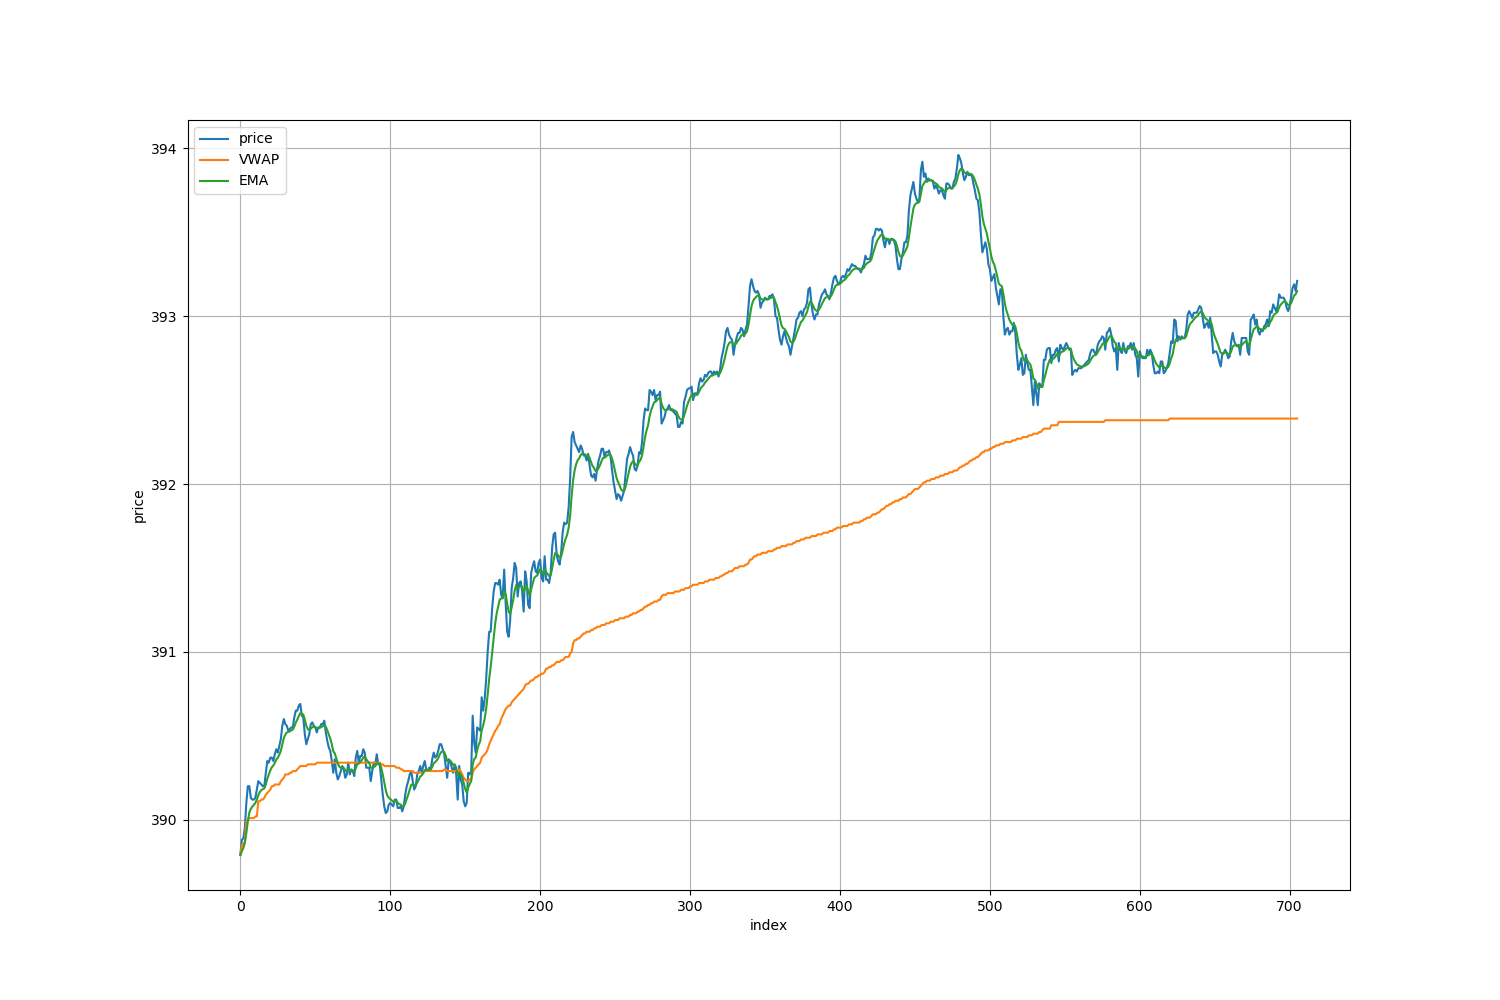

In [8]:
from IPython.display import Image
Image(filename='graphMar22.png')

Graph for March 23:

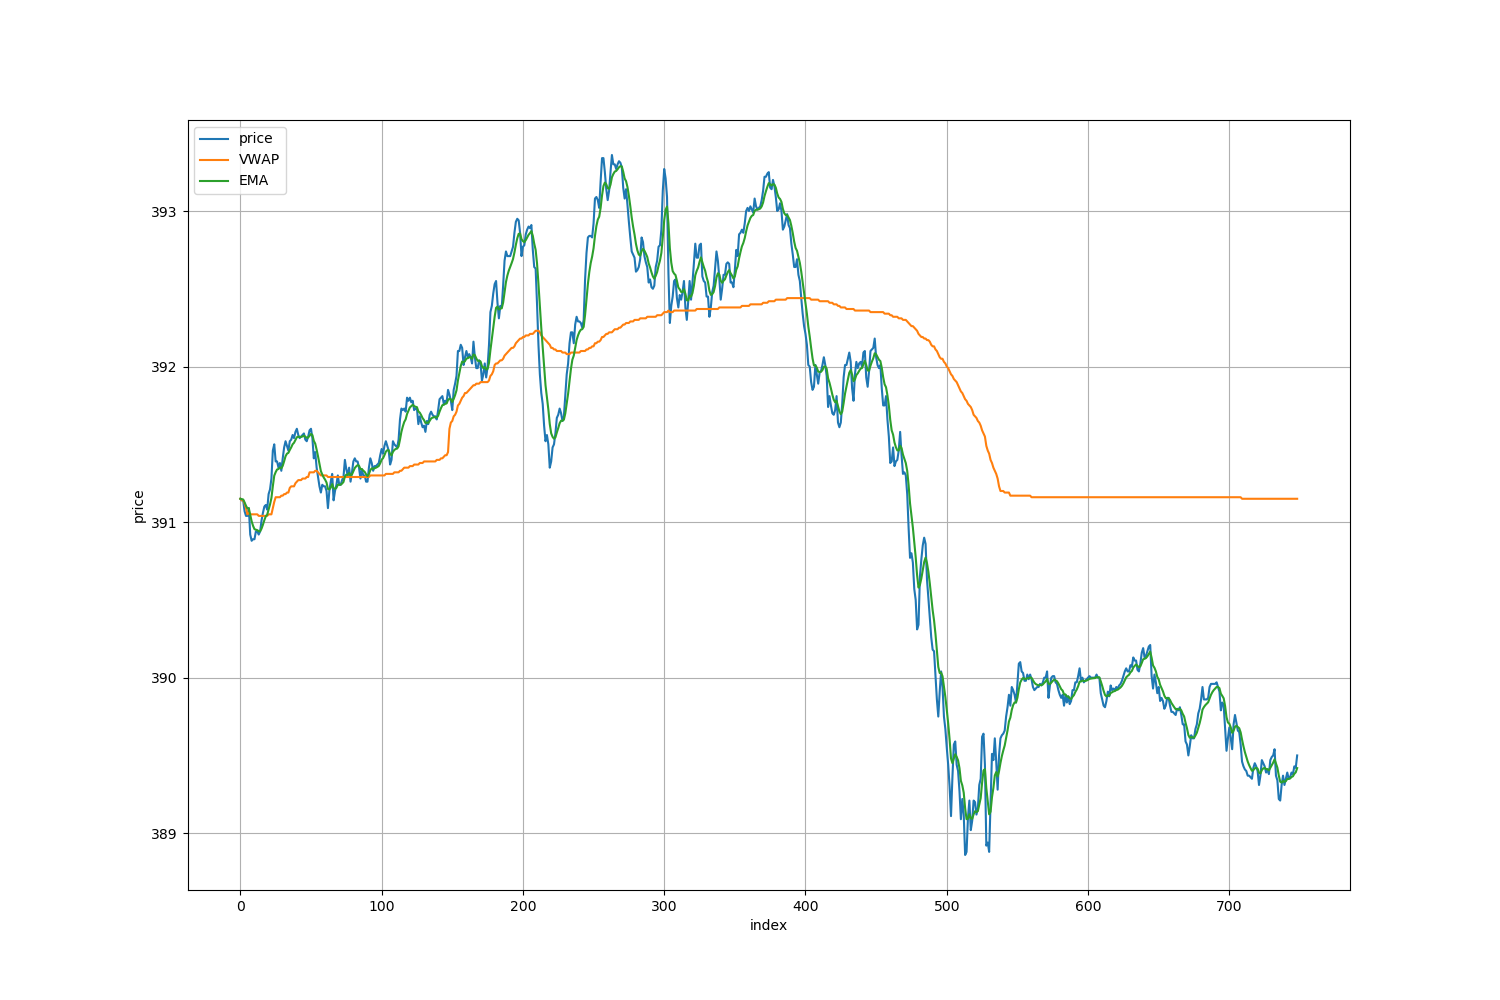

In [9]:
from IPython.display import Image
Image(filename='graphMar23.png')

Graph for March 24:

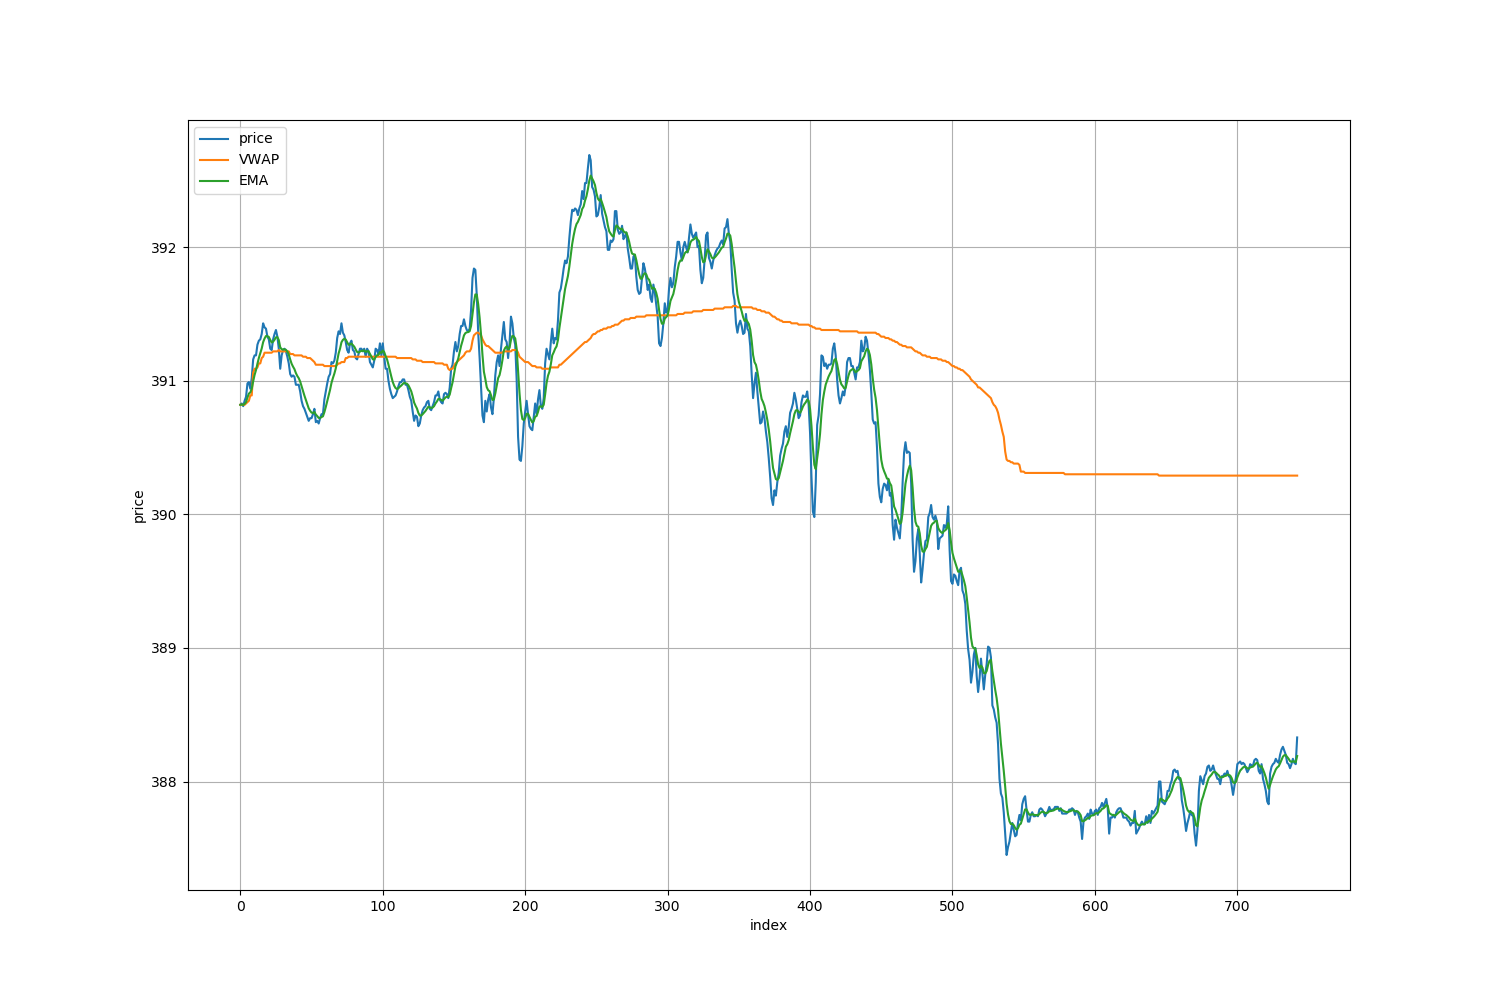

In [10]:
from IPython.display import Image
Image(filename='graphMar24.png')

Graph for March 25:

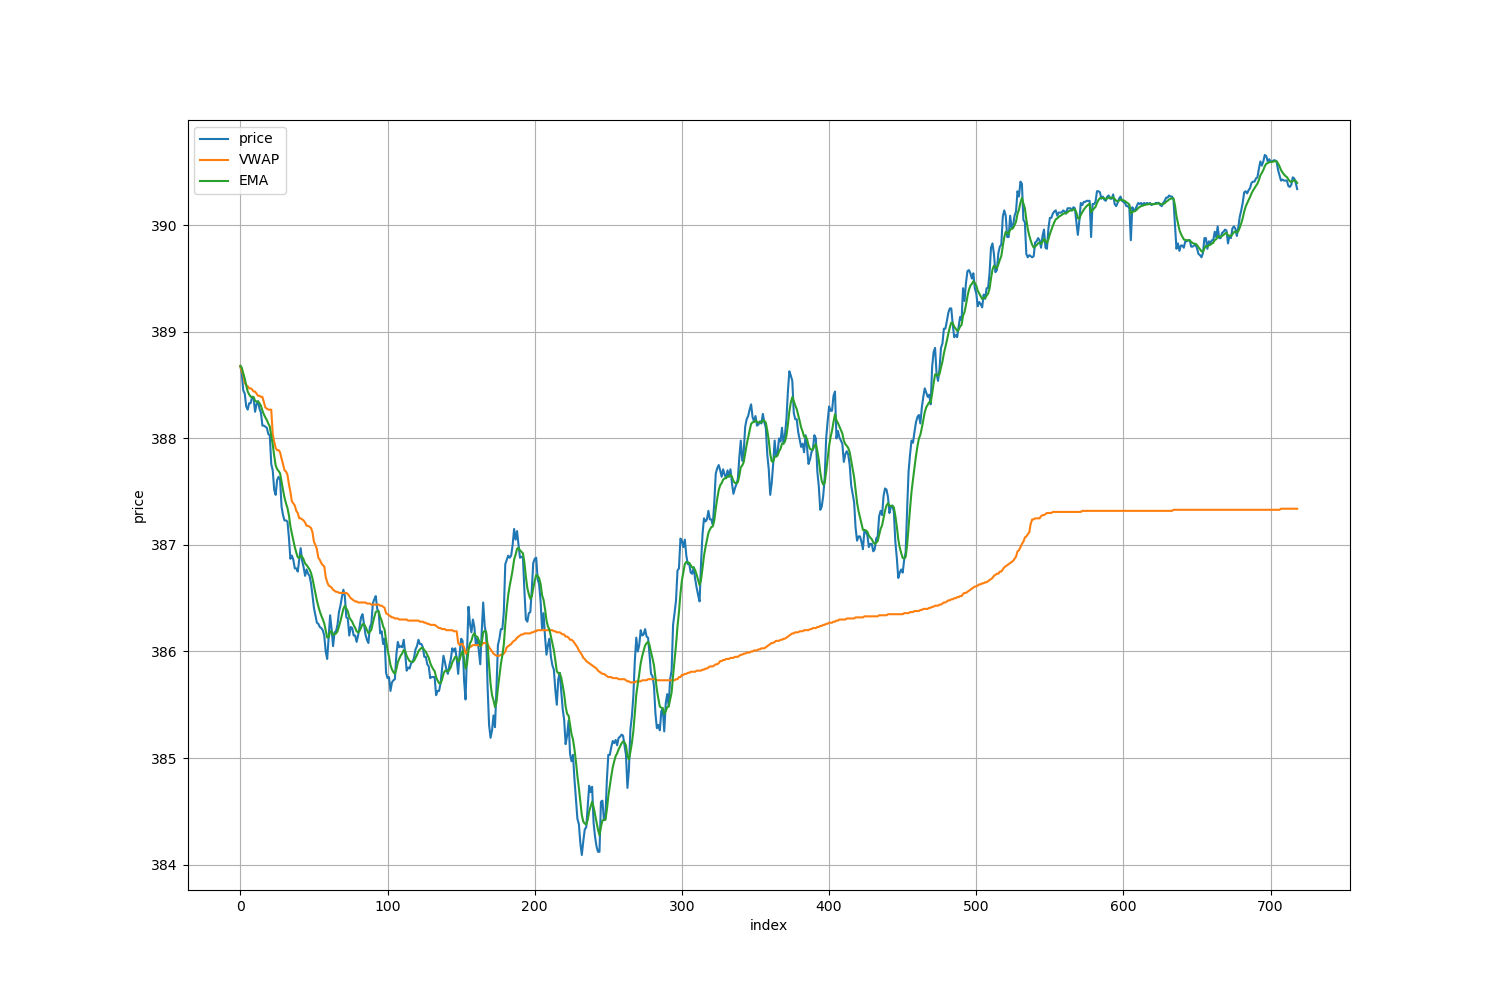

In [11]:
from IPython.display import Image
Image(filename='graphMar25.png')

Graph for March 26:

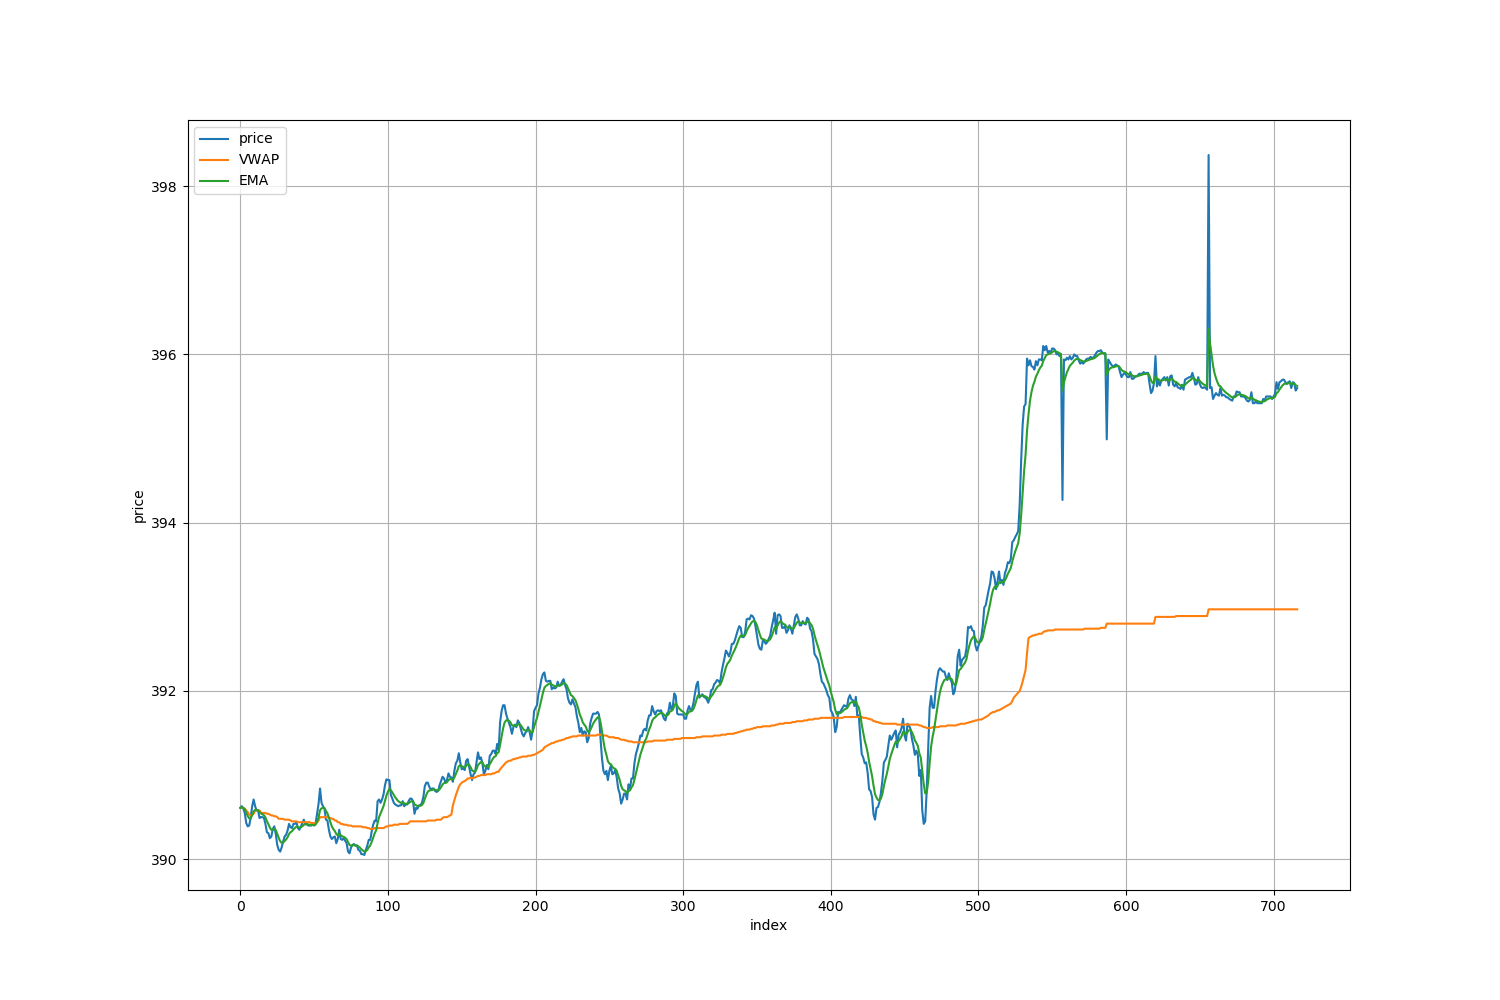

In [12]:
from IPython.display import Image
Image(filename='graphMar26.png')

t-test AVG. Example for March 22:

In [13]:
#t-test
researchpy.ttest(df['AVG'], df['EMA'])

(   Variable       N        Mean        SD        SE   95% Conf.    Interval
 0       AVG   706.0  392.199377  1.166204  0.043891  392.113205  392.285549
 1       EMA   706.0  392.185099  1.172027  0.044110  392.098497  392.271701
 2  combined  1412.0  392.192238  1.168727  0.031103  392.131226  392.253250,
           Independent t-test    results
 0  Difference (AVG - EMA) =      0.0143
 1      Degrees of freedom =   1410.0000
 2                       t =      0.2295
 3   Two side test p value =      0.8186
 4  Difference < 0 p value =      0.5907
 5  Difference > 0 p value =      0.4093
 6               Cohen's d =      0.0122
 7               Hedge's g =      0.0122
 8           Glass's delta =      0.0122
 9                       r =      0.0061)

t-test VWAP. Example for March 22:

In [14]:
#t-test
researchpy.ttest(df['AVG'], df['VWAP'])

(   Variable       N        Mean        SD        SE   95% Conf.    Interval
 0       AVG   706.0  392.199377  1.166204  0.043891  392.113205  392.285549
 1      VWAP   706.0  391.451119  0.811241  0.030531  391.391176  391.511062
 2  combined  1412.0  391.825248  1.071648  0.028519  391.769304  391.881192,
            Independent t-test    results
 0  Difference (AVG - VWAP) =      0.7483
 1       Degrees of freedom =   1410.0000
 2                        t =     13.9951
 3    Two side test p value =      0.0000
 4   Difference < 0 p value =      1.0000
 5   Difference > 0 p value =      0.0000
 6                Cohen's d =      0.7449
 7                Hedge's g =      0.7445
 8            Glass's delta =      0.6416
 9                        r =      0.3492)